# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


   ***Описание данных:***

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

***План работы:***

1. Открываем датасет, изучаем общую информацию. Ищем проблемные места.
2. Предобработка данных. Убираем пропуски, дубликаты, аномалии, меняем тип данных где необходимо.
3. Добавляем  новые столбцы при необходимости, для исследовательского анализа.
4. Исследовательский анализ. Изучаем зависимости, выявляем закономерности, ищем ответы на вопросы.
5. Общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [6]:
# Импортируем библиотеки pandas и matplotlib.pyplot

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Сохраним датафрейм в переменной df

try:
    df = pd.read_csv('~/Desktop/Практикум_Data_Science/Анализ данных/Проект/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [10]:
pd.set_option("display.max_columns", 100) # уберем ограничения по количеству колонок

df.head(10) # посмотрим первые 10 строк исходной таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрев на таблицу, видим первые проблемы с данными:

* Формат даты в `first_day_exposition` не удобен для работы. Нужно его преобразовать в Datetime.
* Название столбца `cityCenters_nearest` не соблюдено в змеином регистре.
* Пропуски в большом количестве столбцов.

In [11]:
# Уберем "верблюда" из 'cityCenters_nearest'
df = df.rename(columns = {'cityCenters_nearest': 'citycenters_nearest'})

In [12]:
df.info() # выведем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Некоторые столбцы имеют пропусков больше половины, а `is_apartment` и вовсе на 90 процентов пустой. Нужно будет избавлятся от них.

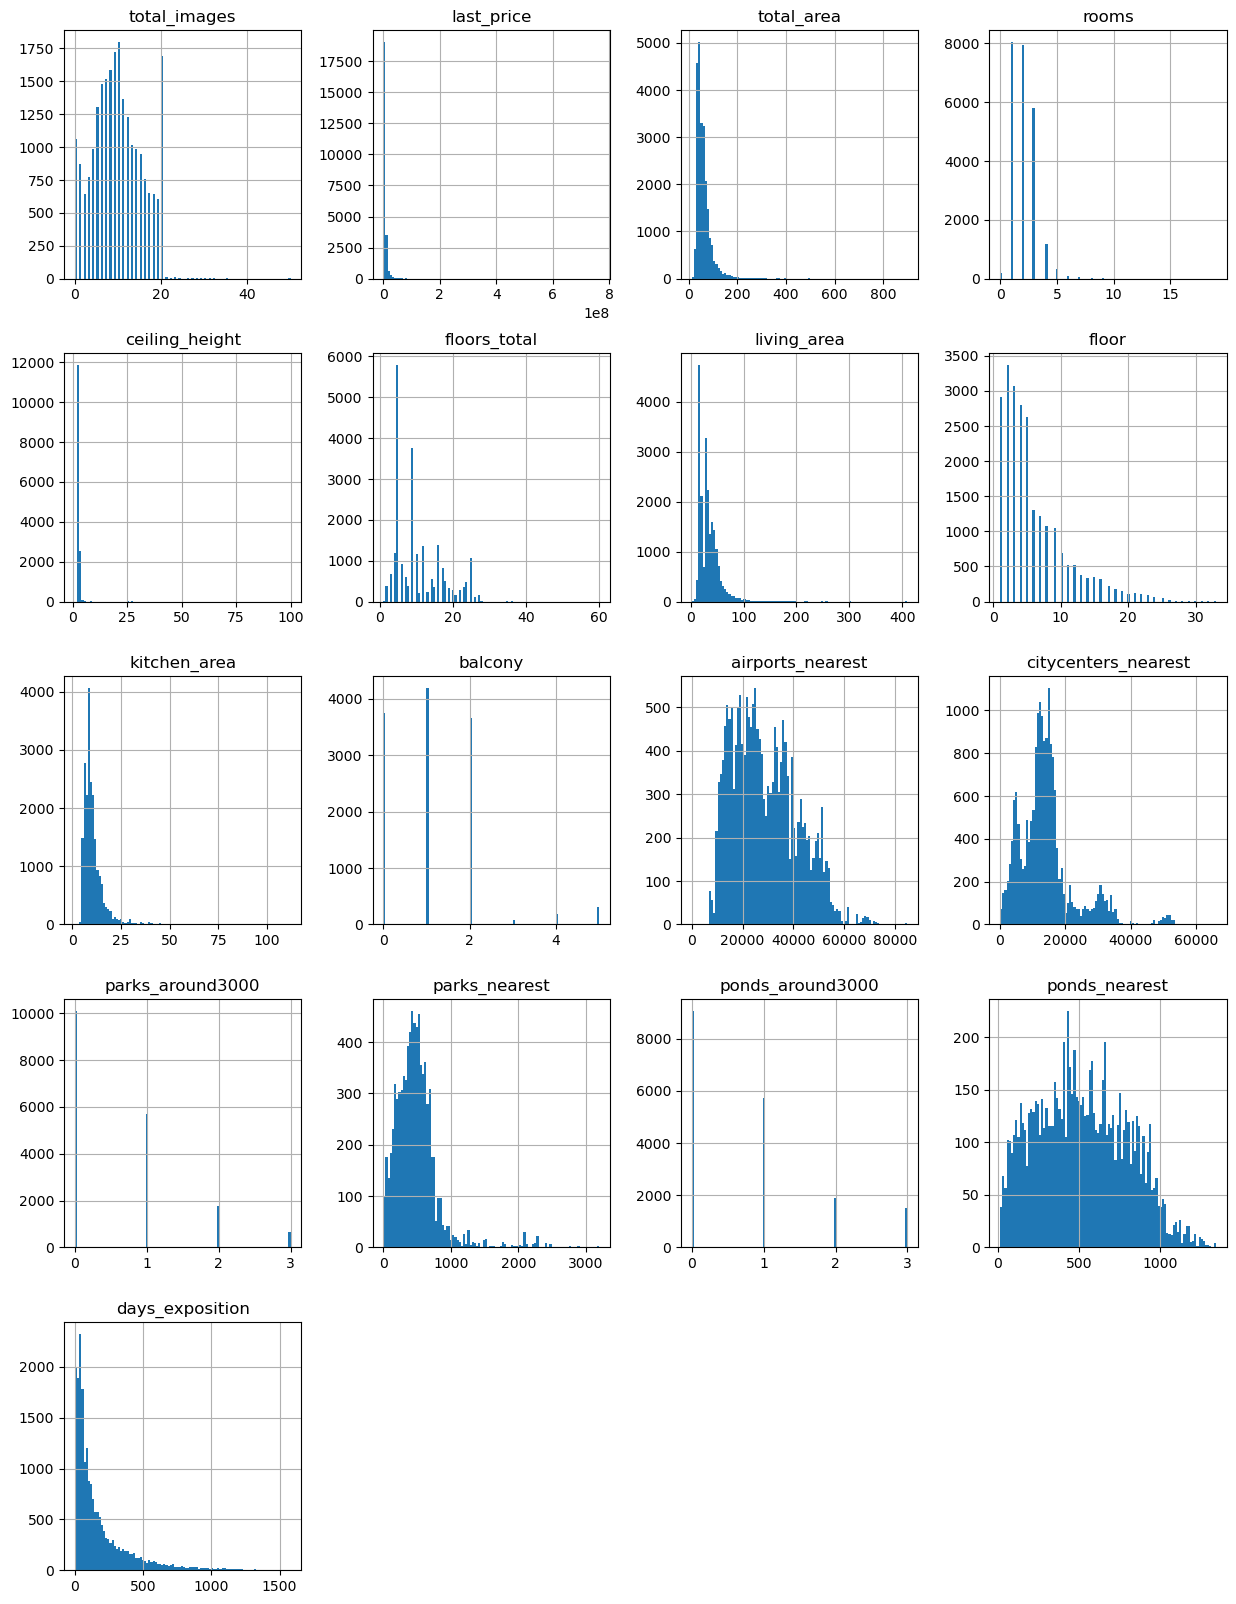

In [13]:
df.hist(figsize=(15, 20), bins=100) # построим гистограммы для всех числовых столбцов
None

Судя по распределению значений в `ceiling_height` существуют квартиры с потолками по 25 метров. Скорее всего забыли поставить запятую в числе. Ну и имеются квартиры которые выбиваются из общей выборки по цене, жилплощади, но их немного. Скорее всего это просто дорогие квартиры.

**Вывод:** При первом знакомстве с архивом обявлений было выявлено что данные нуждаются в предобработке. А именно: исправление форматов данных столбцов, обработка пропусков, избавление от аномалий и возможно что-то еще(категоризация данных, обработка дубликатов).

### Предобработка данных

#### Заполняем пропуски

In [8]:
df.isna().sum() # посмотрим количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# Удалим строки в которых отсутствует количество этажей и название населенного пункта. 
# Их не так много (меньше 1%), можем себе позволить.

df = df.dropna(subset=['floors_total', 'locality_name'])

In [10]:
# Если не указаны аппартаменты, скорее всего их нет.
# Заменим пустые значения на False.

df['is_apartment'] = df['is_apartment'].fillna(False)

In [11]:
# Заполним пропуски в количестве балконов, парков и водоемов нулевыми значениями,
# скорее всего, продавцы не указали их по причине отсутствия.

df[['balcony', 'parks_around3000', 'ponds_around3000']] = df[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)

In [12]:
# Пропуски в столбцах с растояниями до парка, водоема, аэропорта, центра города обусловлены либо большим расстоянием,
# либо отсутствием как таковых объектов в населенном пункте(парков, водоемов). 
# Заполним пропуски значением '-1' т.к. '0' можно интерпретировать так, что дом находится в парке.

columns_to_fill = ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'citycenters_nearest', 'days_exposition']
df[columns_to_fill] = df[columns_to_fill].fillna(-1)

In [13]:
# Заполним пропуски по высоте потолков медианными значениеми.

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [14]:
# Выведем на экран медианные значения долей жилплощади и кухни от общей площади дома
# и заполним пропуски 'living_area' и 'kitchen_area' произведением медианы в этих колонках на общую площадь 

df['living_area'] = df['living_area'].fillna(df['total_area'] * (df['living_area'] / df['total_area']).median())
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * (df['kitchen_area'] / df['total_area']).median())

[(df['living_area'] / df['total_area']).median(), (df['kitchen_area'] / df['total_area']).median()]

[0.568210015790661, 0.1723625557206538]

#### Изменяем типы данных в столбцах

In [15]:
df.info() # выведем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [16]:
df.head() # выведем таблицу для наглядности

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.345393,9,False,False,False,27.405646,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Во всех столбцах с числами, кроме `ceiling_height` дробная часть почти не имеет значения. Переведем их все в формат **`int`**.

In [17]:
# Создаем список колонок  где будем менять тип данных на целочисленный
col_to_int = ['last_price', 'total_area', 'floors_total', 'living_area', 'kitchen_area',
              'balcony', 'airports_nearest', 'citycenters_nearest', 'parks_around3000', 'parks_nearest', 
              'ponds_around3000', 'ponds_nearest', 'days_exposition']

df[col_to_int] = df[col_to_int].astype('int64') # меняем тип на int

df.info() # смотрим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  int64  
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  int64  
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  int64  
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [18]:
# Изменим формат даты на datetime

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df.info()
df.head() # посмотрим на результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,-1
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,посёлок Шушары,12817,18603,0,-1,0,-1,81
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24,3,2.65,14,90,9,False,False,False,27,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121


#### Убираем дубликаты в названиях населенных пунктов

In [19]:
# Выведем уникальные значения населенных пунктов

print(len(df['locality_name'].unique())) # количество 
df['locality_name'].unique() # значения

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

На входе имеем **364** разных названий. Вручную перебрать такой массив будет достаточно проблематично. Поэтому будем делать работу по шагам. Для начала можно убрать букву *ё* которая очень часто встречается в слове *посёлок*.

In [20]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # меняем ё на е
len(df['locality_name'].unique()) # смотрим количество значений

330

Исправив одну букву, избавились сразу от 34 дубликатов. Продолжаем в том же духе!

In [21]:
# Выведем еще раз массив уникальных значений
# и еще отсортируем по алфавиту.

sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Федоровское',
 'городской поселок Янино-1',
 'деревня

Для сужения круга поиска двойников, в каждом значении массива оставим только последнее слово, а потом выведем дубликаты.

In [22]:
last_words_loc = [] # создаем пустой список

for loc in df['locality_name'].unique(): # перебираем массив уникальных значений населенных пунктов
    word = loc.split()[-1] # берем последнее слово
    last_words_loc.append(word) # добавляем в новый список

words = pd.DataFrame(last_words_loc) # создаем из полученного списка Series
repeat_words = words[words.duplicated()][0].unique() # оставляем повторяющиеся слова
repeat_words # выводим на экран

array(['Мурино', 'Бор', 'Кудрово', 'Павлово', 'Федоровское', 'Ропша',
       'Колпаны', 'Рахья', 'Бегуницы', 'Рябово', 'Мга', 'Никольское',
       'Ладога', 'Рощино', 'Лесогорский', 'Щеглово', 'Вещево', 'Горка',
       'Назия', 'Приветнинское', 'Советский', 'Любань', 'Зимитицы',
       'Гарболово', 'Ижора', 'Громово', 'Калитино', 'Приладожский',
       'Рабитицы', 'Романовка', 'Лесное'], dtype=object)

Названия населенных пунктов "Мурино", "Кудрово", "Рябово" и др. имеют дубликаты. Разберемся более  подробно. 
Для этого выведем список уникальных названий столбца `'locality_name'`, имеющих вхождения из списка выше.

In [23]:
duplicated_name = [] # пустой список

for word in repeat_words: # перебираем повторяющиеся слова
    for loc_name in df['locality_name'].unique():
        if loc_name.split()[-1] == word:
            duplicated_name.append(loc_name)
duplicated_name

['поселок Мурино',
 'Мурино',
 'поселок городского типа Красный Бор',
 'Сосновый Бор',
 'деревня Чудской Бор',
 'деревня Бор',
 'деревня Трубников Бор',
 'поселок Пансионат Зеленый Бор',
 'деревня Кудрово',
 'Кудрово',
 'село Павлово',
 'городской поселок Павлово',
 'поселок городского типа Павлово',
 'деревня Федоровское',
 'городской поселок Федоровское',
 'садовое товарищество Новая Ропша',
 'поселок Ропша',
 'деревня Большие Колпаны',
 'деревня Малые Колпаны',
 'поселок городского типа Рахья',
 'садовое товарищество Рахья',
 'деревня Бегуницы',
 'деревня Старые Бегуницы',
 'поселок Рябово',
 'поселок городского типа Рябово',
 'городской поселок Мга',
 'поселок городского типа Мга',
 'Никольское',
 'село Никольское',
 'Новая Ладога',
 'село Старая Ладога',
 'поселок городского типа Рощино',
 'городской поселок Рощино',
 'городской поселок Лесогорский',
 'поселок городского типа Лесогорский',
 'поселок Щеглово',
 'деревня Щеглово',
 'поселок станции Вещево',
 'поселок при железнодоро

Такой массив перебирать уже гораздо проще. В ходе анализа было выявлено следущее:
* словосоетания "поселок городского типа" и "городской поселок" описывают одни населенные пункты;
* "поселок станции" и "поселок при железнодорожной станции" дублирующие сочетания;
* "поселок Мурино" и "Мурино", "деревня Кудрово" и "Кудрово", "поселок Рябово" и "поселок городского типа Рябово" также являются дубликатами.

In [24]:
# Для устранения дубликатов напишем функцию.

def category_name_no_duplicates(row):
    if 'Мурино' in row:
        return 'Мурино'
    elif 'Кудрово' in row:
        return 'Кудрово'
    elif 'Рябово' in row:
        return 'поселок городского типа Рябово'
    elif 'городской поселок' in row:
        return row.replace('городской поселок', 'поселок городского типа')
    elif 'поселок станции' in row:
        return row.replace('поселок станции', 'поселок при железнодорожной станции')
    else:
        return row

In [25]:
# Применим функцию к датафрейму
df['locality_name'] = df['locality_name'].apply(category_name_no_duplicates)

# Выводим уникальные значения
print(df['locality_name'].unique())
len(sorted(df['locality_name'].unique()))

['Санкт-Петербург' 'поселок Шушары' 'поселок городского типа Янино-1'
 'поселок Парголово' 'Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'Кудрово' 'Коммунар' 'Колпино' 'поселок городского типа Красный Бор'
 'Гатчина' 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой'
 'поселок городского типа Лебяжье' 'поселок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино' 'поселок Романовка'

318

После обработки, количество дубликатов уменьшилось с 364 до 318 **(46 шт)**.

#### Устраняем редкие и выбивающиеся значения

In [26]:
df.shape # размер датафрейма до исправления аномалий

(23565, 22)

Нарисуем 2 вида графиков для численных значений: boxplot("усы") и hist("гистограммы"). Они нам помогут выбрать пороги вхождения данных.

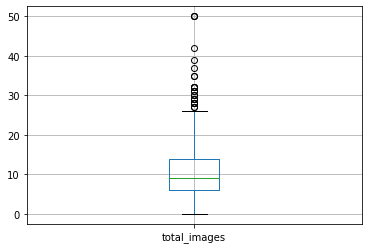

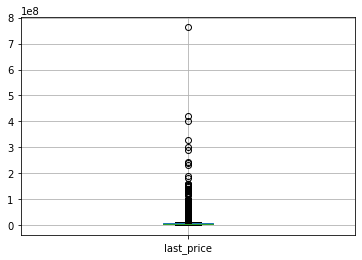

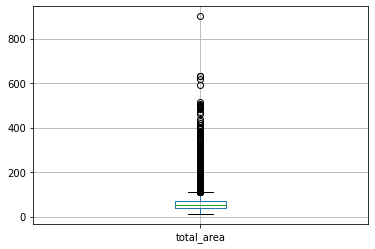

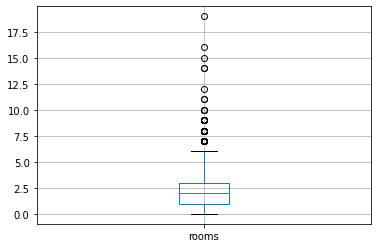

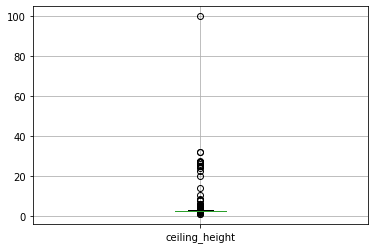

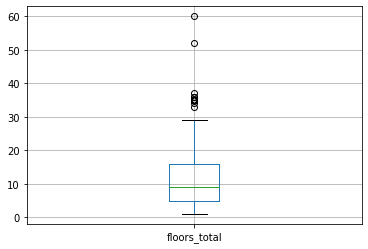

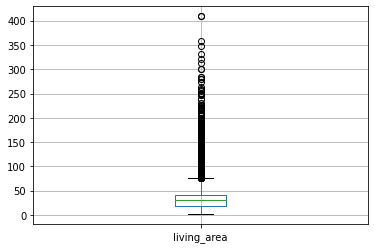

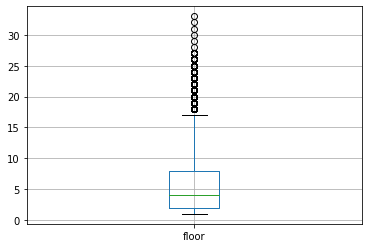

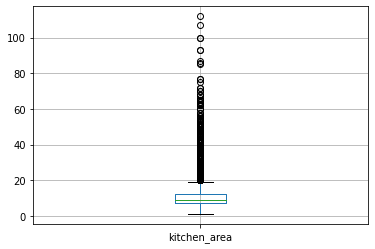

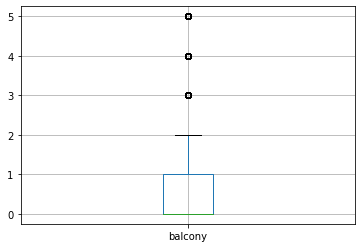

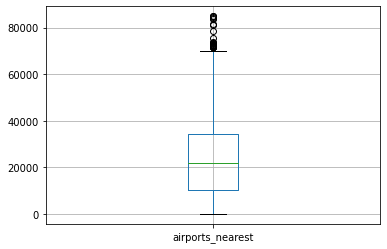

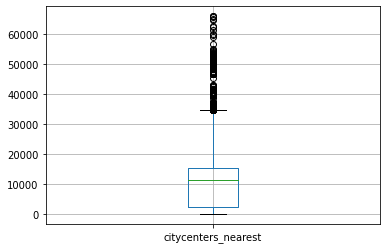

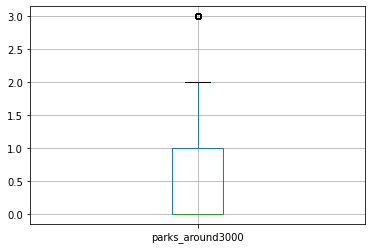

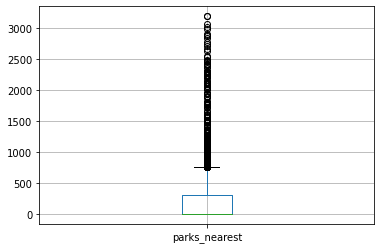

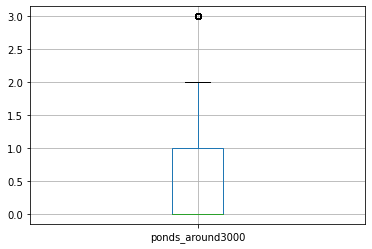

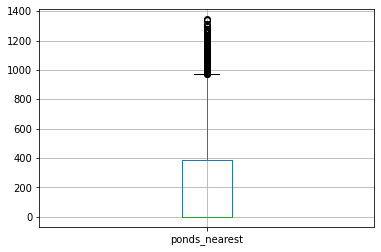

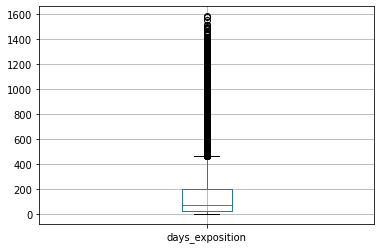

In [27]:
cols = ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'airports_nearest', 'citycenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition']

for col in cols:
    df.boxplot(column=col)
    plt.show()

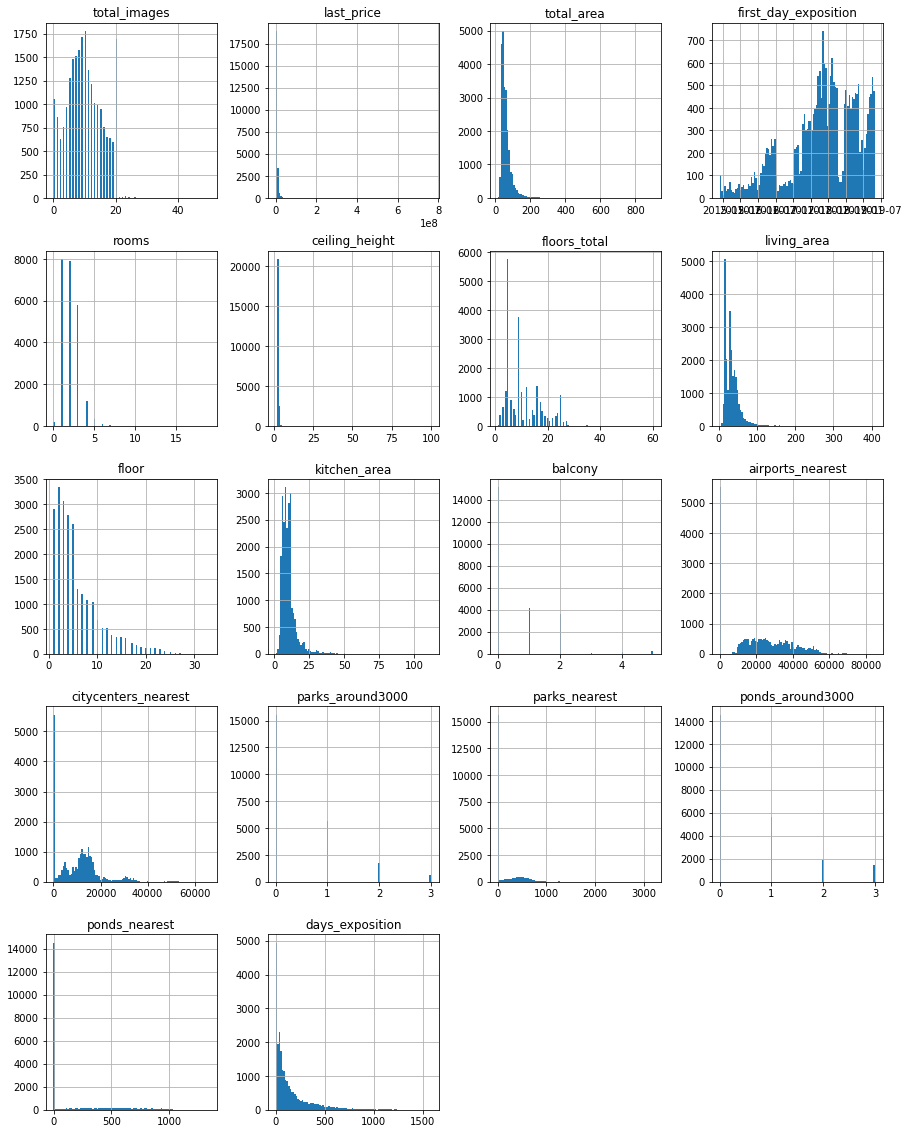

In [28]:
df.hist(figsize=(15, 20), bins=100)
plt.show()

Внимательно изучив графики, были определены границы вхождения данных. Они выбирались таким образом, чтобы убрать не более 10 процентов от общего объема, но одновременно достаточно много, чтобы убрать крайние выбивающиеся значения.

p.s. Часть вычислений решил не писать, чтобы не нагромождать много текста (например есть объявление с ценой меньше 100000, но площадью 100 кв.м, и др.)

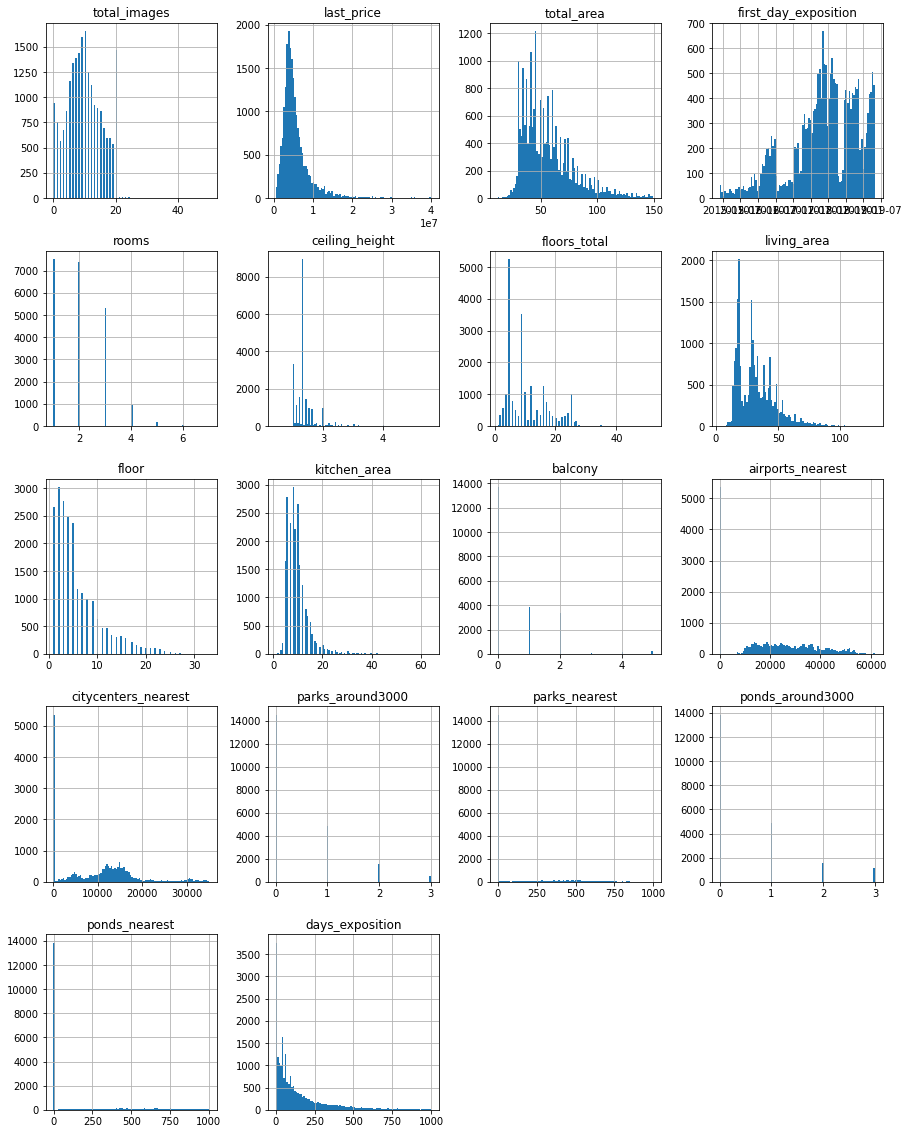

In [29]:
# Фильтруем данные несколькими запросами.

df = df.query('last_price < 40000000')
df = df.query('last_price > 100000')
df = df.query('total_area < 150')
df = df.query('rooms > 0')
df = df.query('ceiling_height < 5')
df = df.query('ceiling_height > 2')
# df = df.query('living_area < 300')
# df = df.query('kitchen_area < 70')
df = df.query('airports_nearest < 70000') 
df = df.query('citycenters_nearest < 35000')
df = df.query('parks_nearest < 1000') 
df = df.query('ponds_nearest < 1000') 
df = df.query('days_exposition < 1000')

df.hist(figsize=(15, 20), bins=100) # построим гистограммы

plt.show()

In [30]:
df.shape # еще раз посмотрим число строк

(21372, 22)

**Вывод:** в ходе предобработки были проведены следущие действия:

* Заполнены пропуски. В столбцах `balcony`, `parks_around3000`, `ponds_around3000` пропуски были заменены на нули. Пропуски в `is_apartment` заменены на **`False`**. Пропуски в `parks_nearest`, `ponds_nearest`, `airports_nearest`, `citycenters_nearest`, `days_exposition` были заменены на -1 для возможности дальнейшей фильтрации. В `ceiling_height` пропуски были заменены медианным значением. 134 строки с пропусками в столбцах `floors_total`, `locality_name` были удалены.


* Изменены типы данных. Все столбцы с дробными значениями были заменены на целые, кроме `ceiling_height`. формат данных в `first_day_exposition` изменен на ***`datetime`***.


* Удалены дубликаты в столбце `locality_name`. количество уникальных названий уменьшилось на 10 процентов.


* Устранены редкие и выбивающиеся значения. Было удалено еще 2193 строк.

Всего в ходе предобработки было удалено около 2327 строк что составляет 9,8 процента от общего числа строк. В конечной выборке осталось более 90% строк.

### Посчитайте и добавьте в таблицу новые столбцы

Для исследования добавим еще несколько столбцов:

 * цена одного квадратного метра;
 * день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 * месяц публикации объявления;
 * год публикации объявления;
 * тип этажа квартиры (значения — «‎первый», «последний», «другой»);
 * расстояние до центра города в километрах.

In [31]:
df.columns # выведем колонки для наглядности

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [32]:
# цена квадратного метра
df['price_sqm'] = (df['last_price'] / df['total_area']).round(-2).astype('int64')

# день недели публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday

# месяц публикации объявления
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

# год публикации объявления
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [33]:
# тип этажа

df['floor_type'] = df.apply(
    lambda x: 'первый' if x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой', axis=1)

In [34]:
# расстояние до центра в километрах

df['citycenters_nearest_km'] = (
        df.apply(lambda x: x['citycenters_nearest'] / 1000 if x['citycenters_nearest'] != -1 else -1, axis=1)
        .round(0)
        .astype('int64')
)

In [35]:
df.head() # выведем обновленный датафрейм

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,floor_type,citycenters_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,-1,120400,3,3,2019,другой,16
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,12817,18603,0,-1,0,-1,81,83800,1,12,2018,первый,19
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92800,3,8,2015,другой,14
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,8
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,False,False,9,0,поселок городского типа Янино-1,-1,-1,0,-1,0,-1,55,96300,0,9,2018,другой,-1


### Проведите исследовательский анализ данных

#### Изучаем распределения

Изучим следущие параметры объектов:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Для этого построим гистрограммы по данным параметрам.

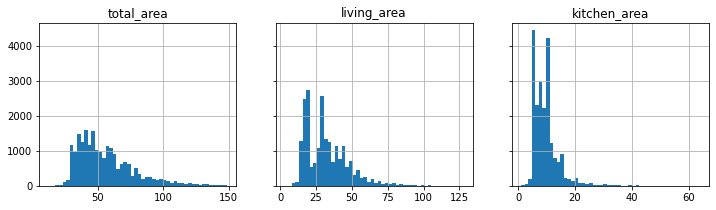

In [36]:
# площадь

figure, axs = plt.subplots(1, 3, sharey=True, figsize=(12,3))
axs[0].hist(df['total_area'], bins=50)
axs[0].set_title('total_area')
axs[0].grid()

axs[1].hist(df['living_area'], bins=50)
axs[1].set_title('living_area')
axs[1].grid()

axs[2].hist(df['kitchen_area'], bins=50)
axs[2].set_title('kitchen_area')
axs[2].grid()

plt.show()

Видим небольшие выбросы, но в целом распределение имеет нормальный вид.

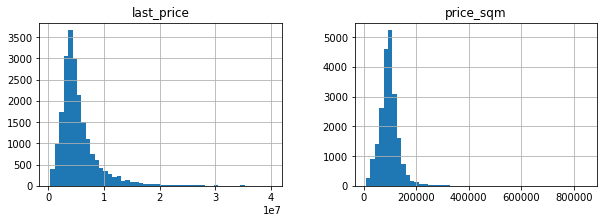

In [37]:
# стоимость и цена квадратного метра

df[['last_price', 'price_sqm']].hist(figsize=(10, 3), bins=50)
plt.show()

Нормальное распределение.

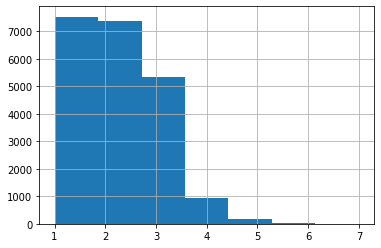

1    7532
2    7393
3    5324
4     935
5     159
6      21
7       8
Name: rooms, dtype: int64

In [38]:
# количество комнат

df['rooms'].hist(bins=7)
plt.show()
df['rooms'].value_counts()

Данные выглядят логично. Больше всего однушек и далее по нисходящей.

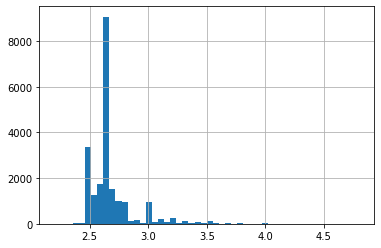

In [39]:
# высота потолков

df['ceiling_height'].hist(bins=50)
plt.show()

Видим выброс в районе медианы. Обьясняется тем, что пропуски заполняли медианой.

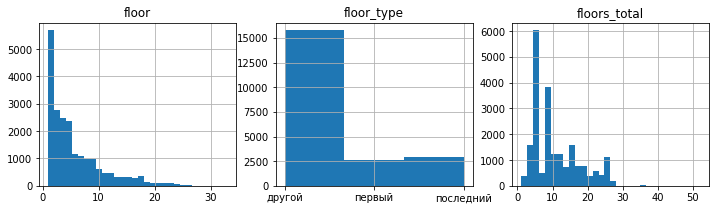

In [40]:
# этажи

figure, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].hist(df['floor'], bins=30)
axs[0].set_title('floor')
axs[0].grid()

axs[1].hist(df['floor_type'], bins=3)
axs[1].set_title('floor_type')
axs[1].grid()

axs[2].hist(df['floors_total'], bins=30)
axs[2].set_title('floors_total')
axs[2].grid()

plt.show()

Данные укладываются в логичную картину. Квартир с этажами ниже продается больше, т.к. самих таких квартир больше. 

Квартир на 1 и на последнем этажам продается примерно одинаково и меньше чем на др. этажах. 

Ну и видно что больше всего домов с 5, 9 этажами - наши любимые "хрущевки" и "брежневки"

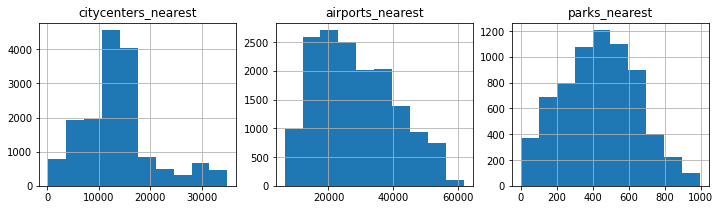

In [41]:
# расстояние до центра города, аэропорта, ближайшего парка

figure, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].hist(df.query('citycenters_nearest > 0')['citycenters_nearest'], bins=10)
axs[0].set_title('citycenters_nearest')
axs[0].grid()

axs[1].hist(df.query('airports_nearest > 0')['airports_nearest'], bins=10)
axs[1].set_title('airports_nearest')
axs[1].grid()

axs[2].hist(df.query('parks_nearest > 0')['parks_nearest'], bins=10)
axs[2].set_title('parks_nearest')
axs[2].grid()

plt.show()

Больше всего квартир продается в 10-15 км от центра(спальные районы). Дальше число квартир падает т.к. заканчивается город.

Расстояние до аэропорта в среднем около 30 км, что логично, т.к. аэропорт не в центре города.

А парков много, они по всему городу равномерно, поэтому распределение расстояний до них нормальное.

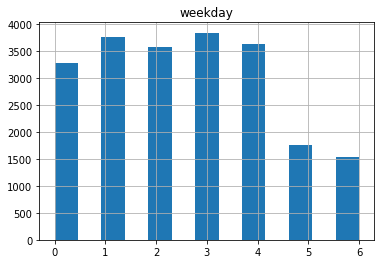

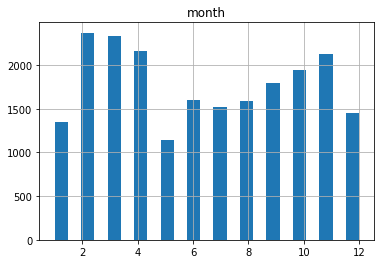

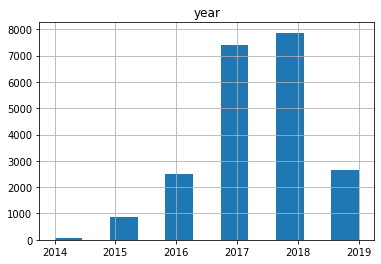

In [42]:
# распределение публикаций объявлений по дням недели, месяцам, годам

df.hist(bins=13, column='weekday')
plt.show()

df.hist(bins=23, column='month')
plt.show()

df.hist(bins=11, column='year')
plt.show()

In [43]:
# распределение объявлений по месяцам в 2019 году

df.query('year == 2019')['month'].value_counts()

4    899
3    812
2    509
1    390
5     56
Name: month, dtype: int64

В выходные квартиры выставляют на продажу реже, отдыхают.

По месяцам: видим спад продаж в декабре, январе, и почему то в мае. Связываю это с большим количеством праздников => выходных.

По годам: видим восходящий, в 2019 спад. Связано это с тем что датафрейм имеет информацию до мая месяца(см. выше)

#### Скорость продажи квартир

Скорость продажи квартиры(в днях):

средняя 143.0 
медиана 71.0


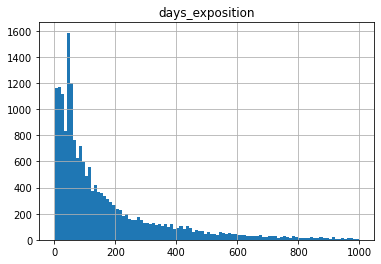

In [44]:
# Препарируем столбец с количеством дней, которое провисело объявление.

print('Скорость продажи квартиры(в днях):''\n\nсредняя', df['days_exposition'].mean().round(0),
      '\nмедиана', df['days_exposition'].median().round(0))

df.query('days_exposition > 0').hist(bins=100, column='days_exposition')
plt.show()

Видим ожидаемое распределение Пуассона, имеющее отношение к распределениям по времени.
Видим пару выбросов в районе 50-70 дней. Думаю это связано с автоснятием объявления с площадки при отсутствии активности.

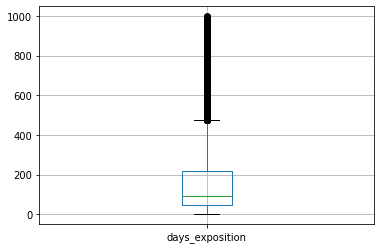

In [45]:
# Построим диаграмму "усы" чтобы иметь представление о выбросах.

df.query('days_exposition > 0').boxplot(column='days_exposition')
plt.show()

Можем сделать вывод что квартиры которые продаются дольше 500 дней уже не укладываются в общее распределение, то есть это аномально долгий срок и встречается он крайне редко. А в целом, 75 процентов квартир продается примерно за 200 дней. Думаю этот срок продажи можно считать приемлемым.

#### Факторы цены

Построим графики зависимости цены от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

In [46]:
# Напишем функцию которая принимает вид графика с колонкой, делает сводную таблицу и рисует график.

# старая функция(больше не нужна, т.к. исправленные графики имеют другой вид)
def sum_plot(fn, *columns):

    fig, axs = plt.subplots(len(columns), 2, figsize=(12, 5 * len(columns)),  squeeze=False)
    func = eval('matplotlib.axes.Axes.' + fn)
    
    i = 0
    for ax in axs:
        func(
            ax[0], df[columns[i]], df['last_price'],
            df.pivot_table(index=columns[i], values="last_price").index,
            df.pivot_table(index=columns[i], values="last_price"),
        )
        ax[0].set_xlabel(columns[i])

        func(
            ax[1], df[columns[i]], df['last_price'],
            df.pivot_table(index=columns[i], values="price_sqm").index,
            df.pivot_table(index=columns[i], values="price_sqm"),
        )
        ax[1].set_xlabel(columns[i])
        i += 1

    axs[0][0].set_title("last_price")
    axs[0][1].set_title("price_sqm")


In [47]:
# новая функция 1(рисует точки, с корреляцией)

def sсatter_plot_with_corr(*columns):

    fig, axs = plt.subplots(len(columns), 2, figsize=(12, 5 * len(columns)),  squeeze=False)
    
    i = 0
    for ax in axs:      
        ax[0].scatter(df[columns[i]], df['last_price'], alpha=0.03)
        ax[0].text(0.05 * max(df[columns[i]]), 38000000,
                   f'correlation = {df[columns[i]].corr(df.last_price).round(2)}')
        ax[0].set_xlim(0, 1.05 * max(df[columns[i]]))
        
        ax[1].scatter(df[columns[i]], df['price_sqm'], alpha=0.03)
        ax[1].text(0.05 * max(df[columns[i]]), 800000,
                   f'correlation = {df[columns[i]].corr(df.price_sqm).round(2)}')
        ax[1].set_xlim(0, 1.05 * max(df[columns[i]]))
        
        ax[0].set_xlabel(columns[i])
        ax[1].set_xlabel(columns[i])
        
        i += 1

    axs[0][0].set_title("last_price")
    axs[0][1].set_title("price_sqm")


In [48]:
# новая функция 2 (рисует линию, без корреляции)
def plot_graph(*columns):

    fig, axs = plt.subplots(len(columns), 2, figsize=(12, 5 * len(columns)),  squeeze=False)

    i = 0
    for ax in axs:
        
        ax[0].plot(
            df.pivot_table(index=columns[i], values="last_price").index,
            df.pivot_table(index=columns[i], values="last_price"),
        )

        ax[1].plot(
            df.pivot_table(index=columns[i], values="price_sqm").index,
            df.pivot_table(index=columns[i], values="price_sqm"),
        )
            
        ax[0].set_xlabel(columns[i])
        ax[1].set_xlabel(columns[i])
        
        i += 1

    axs[0][0].set_title("last_price")
    axs[0][1].set_title("price_sqm")


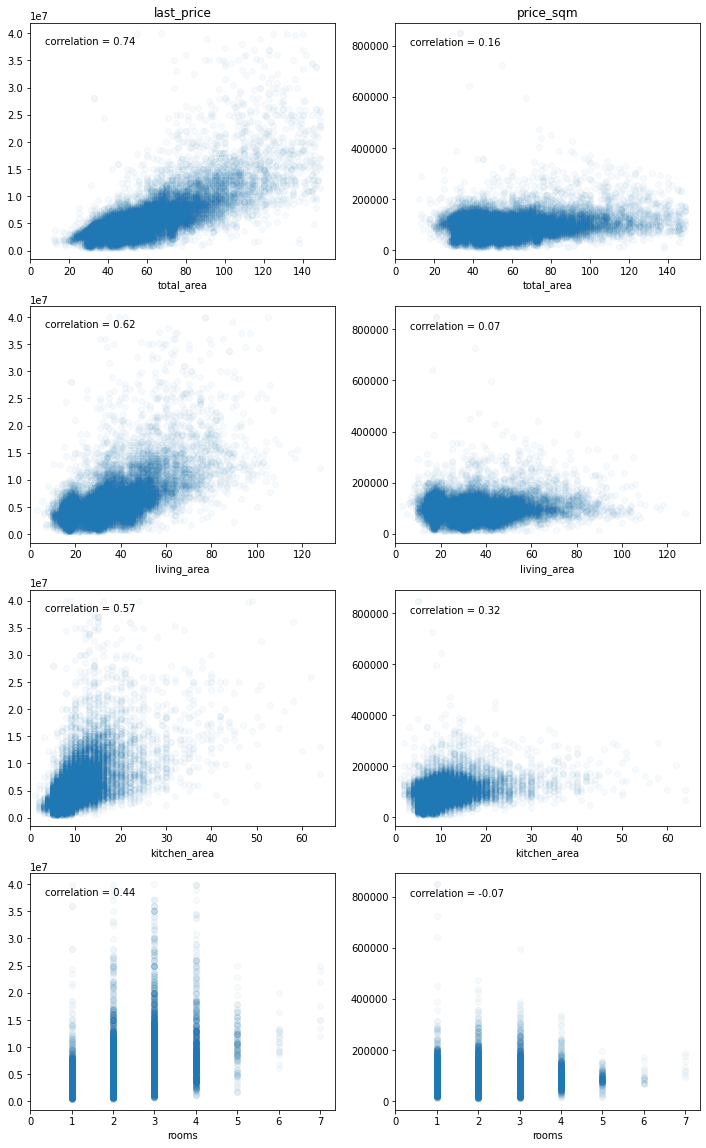

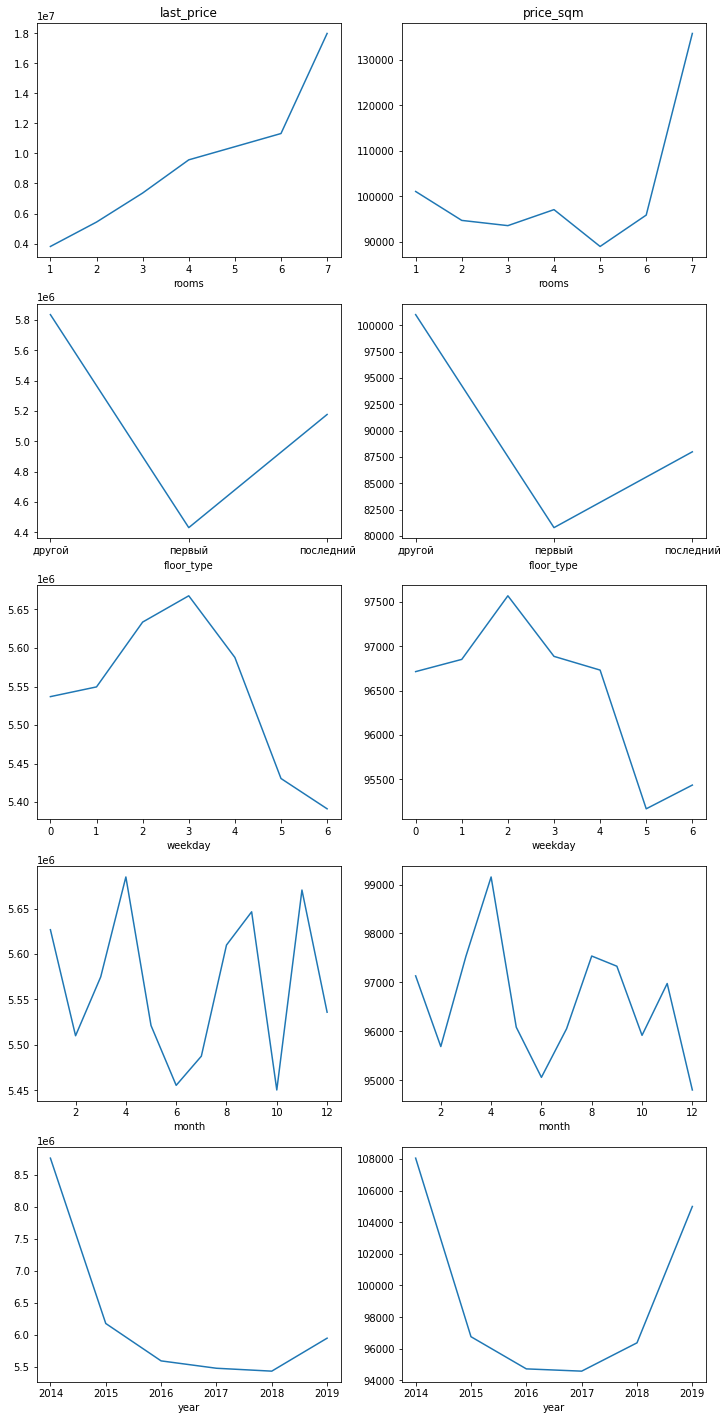

In [49]:
# Рисуем графики.
import matplotlib

sсatter_plot_with_corr('total_area', 'living_area', 'kitchen_area', 'rooms') # точечные графики

plot_graph('rooms','floor_type', 'weekday', 'month', 'year') # линии

***Пояснение***

**Слева - зависимость стоимости квартир, справа - цены квадратного метра.**

**Взаимосвязь цены квадратного метра от площади очень слабая. Неважно какая площадь(общая, жилая, площадь кухни). Максимальный коэффициент корреляции = 0.32.**

**Корреляция между стоимостью квартиры и площадью уже чуть больше(0.57 - 0.72) - средний уровень.**

**Корреляция между ценой квадратного метра и количеством комнат отсутствует(-0.07 очень слабая)**

**Квартиры на последнем этаже в среднем дороже квартир на 1 этаже(разница ~10 процентов).**

**Квартиры, которые продают в будни, чуть дороже (колебания ~2 процента).**

**По месяцам видим настоящую чехарду. Волнообразное движение цены, видимо связанное с сезонностью, наличием отпусков, праздников, и других факторов, влияющих на спрос. Дешевле всего покупать квартиру в начале лета, середине осени или конце зимы (разброс ~5 процентов)**

**На последнем графике по годам, видим падение цены до 2018 года, далее рост(возможно связано с тем что за 2019 имеем неполный год). В целом видим тенденцию на удешевление квртир. Рынок недвижимости разрастается, предложения больше (размах около 13 процентов)**

#### Самые дорогие города

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [50]:
# Делаем сводную табличку цены квадратного метра по городам, выводим 10 самых распространенных локаций.

df_locality_price = df.pivot_table(index='locality_name', values='price_sqm', aggfunc=['count', 'mean', 'median']).astype(int)
df_locality_price.columns = ['num_of_ads', 'price_sqm_mean', 'price_sqm_median']
df_locality_price_sort = df_locality_price.sort_values('num_of_ads', ascending=False).head(10)
df_locality_price_sort

,num_of_ads,price_sqm_mean,price_sqm_median
locality_name,,,
Санкт-Петербург,14132,111411,104500
Мурино,553,86238,85700
Кудрово,442,95630,95850
поселок Шушары,426,78655,76900
Всеволожск,386,69102,65800
Пушкин,342,103664,100000
поселок Парголово,321,90873,92300
Колпино,313,75309,74500
Гатчина,306,69055,67900


Санкт-Петербург


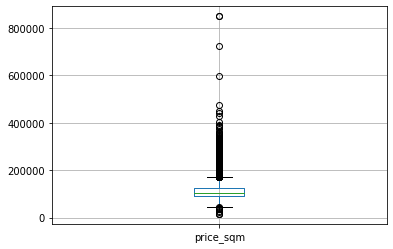

Мурино


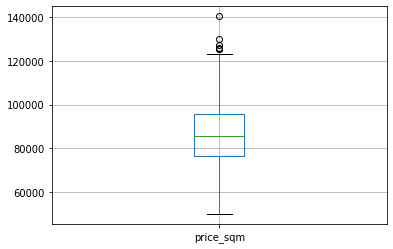

Кудрово


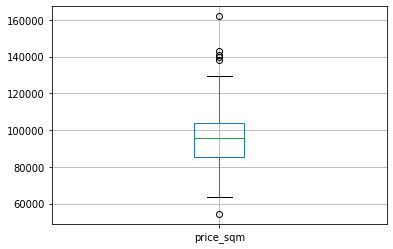

поселок Шушары


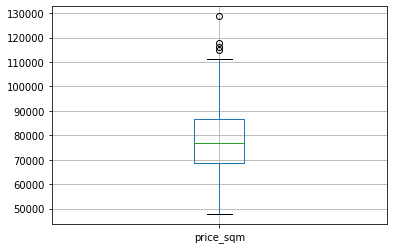

Всеволожск


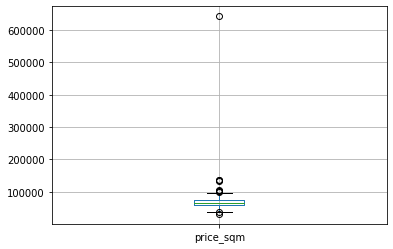

Пушкин


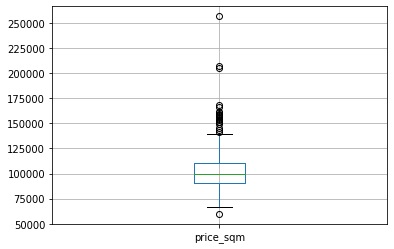

поселок Парголово


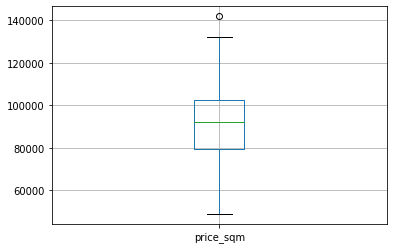

Колпино


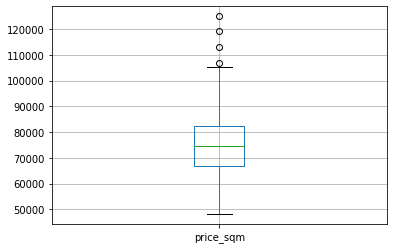

Гатчина


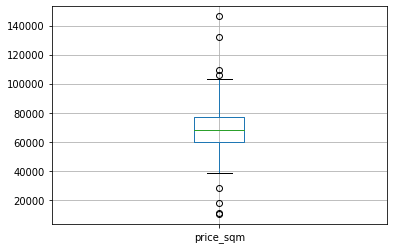

Выборг


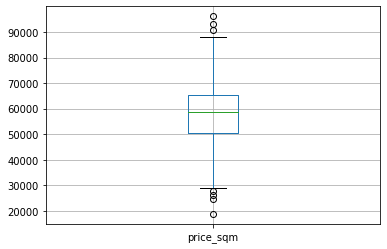

In [51]:
# Построим "усы" для топ 10 нас пунктов

top_10 = df_locality_price_sort.index
for col in top_10:
    print(col)
    df.query(f'locality_name == "{col}"').boxplot(column='price_sqm')
    plt.show()

(0.0, 200000.0)

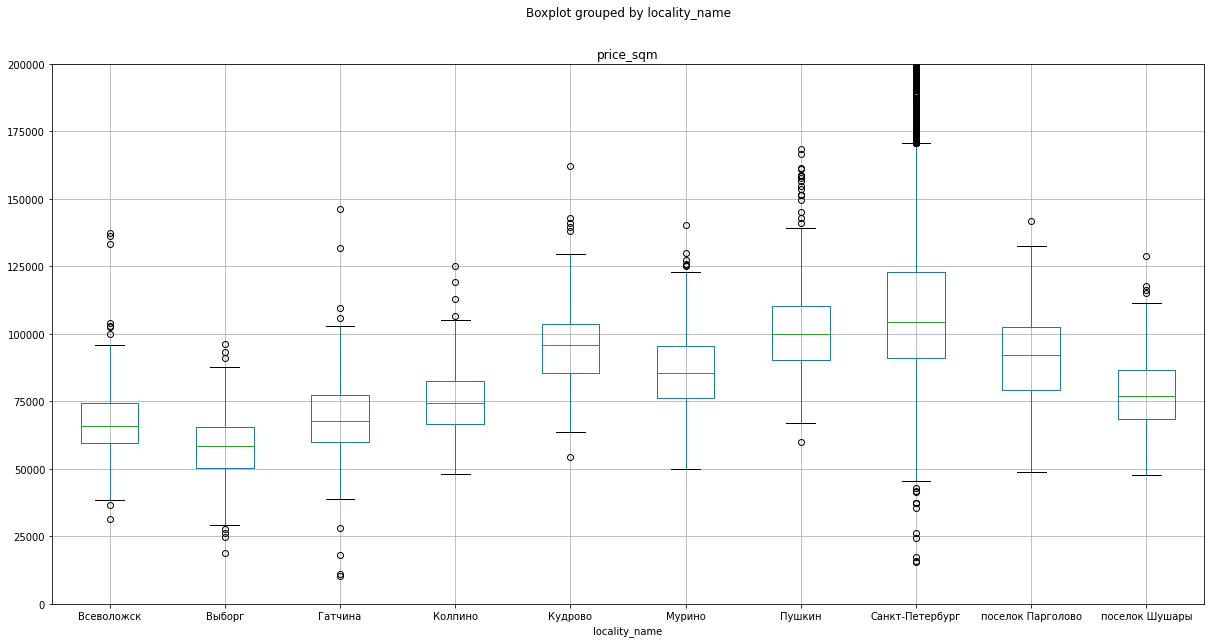

In [52]:
# Код ревьюера

top_locality = df['locality_name'].value_counts().sort_values(ascending=False).head(10)

ax = (df
    .query('locality_name in @df_locality_price_sort.index')
    .boxplot('price_sqm', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

In [53]:
# Выводим где самая высокая и самая низкая цена.

max_index = df_locality_price_sort[df_locality_price_sort['price_sqm_mean'] == max(df_locality_price_sort['price_sqm_mean'])]
min_index = df_locality_price_sort[df_locality_price_sort['price_sqm_mean'] == min(df_locality_price_sort['price_sqm_mean'])]

print(f'Самая высокая стоимость кв. метра - {max_index.index[0]} {max_index.price_sqm_mean.values[0]} руб кв.м')
print(f'Самая низкая стоимость кв. метра - {min_index.index[0]} {min_index.price_sqm_mean.values[0]} руб кв.м')
# maximu

Самая высокая стоимость кв. метра - Санкт-Петербург 111411 руб кв.м
Самая низкая стоимость кв. метра - Выборг 58310 руб кв.м


Как и ожидалось, чем ближе к Питеру, тем дороже. Самая дешевая недвижимость из топ-10 в Выборге, который в 100 км от Санкт-Петербурга. В Выборге квартира будет в среднем почти в 2 раза дешевле.

#### Зависимость цены от расстояния до центра

In [54]:
# Создаем сводную таблицу.

df_spb = df.query('locality_name == "Санкт-Петербург" and citycenters_nearest_km >= 0')
df_spb_price_km = df_spb.pivot_table(index='citycenters_nearest_km', values=['last_price', 'price_sqm']).astype('int')
df_spb_price_km

,last_price,price_sqm
citycenters_nearest_km,,
0,12605714,155207
1,11289411,147045
2,10900951,137516
3,9148591,118167
4,9890208,128251
5,10334187,134973
6,9739806,136755
7,10008830,138916
8,8104273,122128


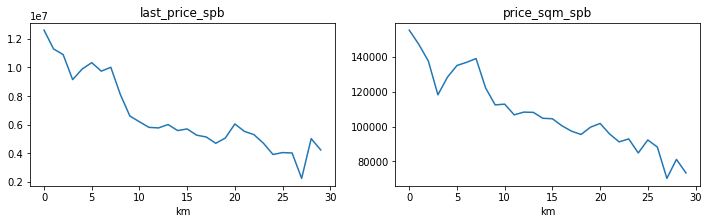

In [55]:
# cтоимость квартиры

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
ax1.plot(df_spb_price_km['last_price'])
ax1.set_title('last_price_spb')
ax1.set_xlabel('km')

# цена квадратного метра

ax2.plot(df_spb_price_km['price_sqm'])
ax2.set_title('price_sqm_spb')
ax2.set_xlabel('km')

plt.show()

Чем дальше от центра, тем дешевле квартиры (разбег цены за кв метр почти в 2 раза от 70к до 130к).

### Общий вывод

 *Описание данных:*

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении


*Вывод:*

В ходе предобработки данных устранили пропуски, изменили типы данных, избавились от дубликатов в названиях населеных пунктов, а также убрали редкие значения, которые выбиваются из общего распределения.

Для проведения анализа добавили новые столбцы: стоимость квадратного метра, несколько столбцов с датой публикации(день недели, месяц, год), тип этажа(первый, последний, другой) и расстояние до центра города в километрах.

Далее в ходе анализа распределений, убедились в том что имеем релевантные данные, и в конце изучили что больше всего влияет на цену квадратного метра.

Перед исследованиями цены, посмотрели на скорость продажи недвижимости. Если квартира продается больше 200 дней, стоит пересмотреть условия, а дольше 500 дней квартиры продаются крайне редко.

Резумируя, можно ранжировать факторы, влияющие на цену недвижимости в порядке убывания значимости:

1. Самые значимые факторы: расстояние до центра города, сам город(чем ближе к Спб тем дороже), площадь квартиры(после 60 кв м стоимость кв метра растет). Каждый фактор может увеличить или уменьшить цену кв м в 2 раза.

2. Далее идет группа менее значимых факторов: тип этажа(первый дешевле последний дороже), год продажи(удешевление рынка), количество комнат(удешевление, если не имеем дело с замком из 7 комнат). Данные факторы могут влиять на цену в пределах 10 процентов, причем очевидно что количество комнат имеет связь с площадью, так что данный параметр можно убрать из уравнения.4

3. И самые незначительные параметры это временные факторы, не считая год: день и месяц продажи(разбег цен 2-5 процентов). Чуть дешевле квартиры продаются по выходным, и по месяцам когда много праздников или идет сезон отпусков.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод